<a href="https://colab.research.google.com/github/20188202010/OM_Puzzles/blob/master/manifold_ilm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
plt.rcParams['legend.fontsize'] = 10

class Config:
    R=10
    H=1
    len_spring=50
    n_points=1000
    POINTS_CHOSEN = [0,784]

def simulate_spring(R, H, len_spring, n_points):
    # Parametric representation of points on spring is (R*cos(t),R*sin(t),H*t)
    t = np.linspace(0, len_spring, n_points+1)
    x = R * np.cos(t)
    y = R * np.sin(t)
    z = H*t
    return t, np.stack([x,y,z])

def plot_spring(data,config=None):
    x,y,z = data
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.scatter3D(x, y, z, label='spring',c='b',s=5)
    ax.plot3D(x[:x.shape[0]//2], y[:x.shape[0]//2], z[:x.shape[0]//2], 'gray')

    ax.legend()
    if config:
        x_p,y_p,z_p = x[config.POINTS_CHOSEN], y[config.POINTS_CHOSEN], z[config.POINTS_CHOSEN]
        for (x_,y_,z_) in zip(x_p,y_p,z_p):
            ax.scatter3D([x_], [y_], [z_], c='r', s=200, marker='x')
    fig.savefig("spring_scatter.png")


def main():
    config = Config()
    t, data = simulate_spring(config.R, config.H, config.len_spring, config.n_points)
    plot_spring(data,config)
    return data


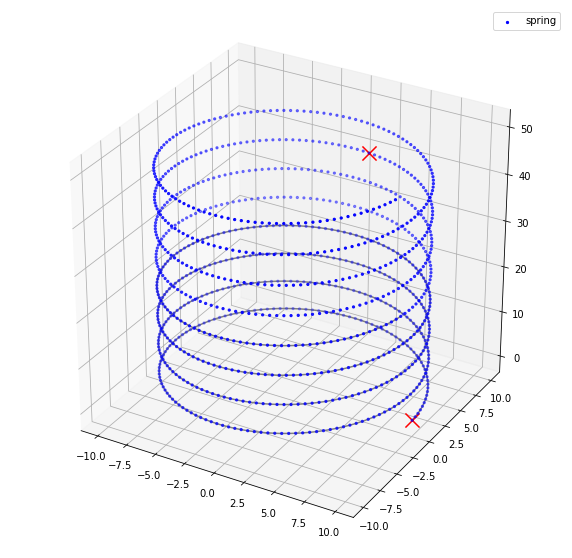

In [10]:
# d = np.array([[9,8],[1,7],[0,6]])
# x,y = d
# x
d = main()
type(d)
d = d.T

In [0]:
from sklearn.neighbors import kneighbors_graph
def findKnn_graph(k,d):
    # include_self - each sample as the first nearest neighbor to itself or not, here not is chosen
    A = kneighbors_graph(d, k, mode='distance', include_self='auto', metric='euclidean') 
    return A

In [12]:
d.shape

(1001, 3)

## q 1 , q2 a

In [0]:
G1 = findKnn_graph(1,d)
G2 = findKnn_graph(2,d)
G3 = findKnn_graph(3,d)
G5 = findKnn_graph(5,d)

In [14]:
print(d[0], d[784])

[10.  0.  0.] [ 0.69851242  9.97557419 39.2       ]


In [0]:
import networkx as nx

In [0]:
def findLength(G):
  n = G.shape[0]
  g = nx.Graph()
  for i in range(n):
    for j in range(n):
      if G[i,j] != 0:
        g.add_edge(i,j, weight = G[i,j])
  print(nx.shortest_path_length(g,source=0,target=784, weight='weight'))

In [17]:
# print(findLength(G1))
print(findLength(G2))
print(findLength(G3))
print(findLength(G5))

393.91418405357854
None
393.825266926224
None
393.6543105845315
None


## q2 b

In [18]:
from sklearn.manifold import Isomap
import math

embedding = Isomap(n_components=3)
X_transformed = embedding.fit_transform(d)
X_transformed.shape

(1001, 3)

In [19]:
X_0 = X_transformed[0]
X_784 = X_transformed[784]
print(X_0, X_784)
print(X_0.shape)

a = math.sqrt((X_0[0] - X_784[0])**2 + (X_0[1] - X_784[1])**2 + (X_0[2] - X_784[2])**2)
print(np.linalg.norm(X_0 - X_784))
print(a)

[ 2.51052519e+02 -1.54541836e-01  3.07661509e-02] [-1.42601698e+02  6.28470640e-02  1.13571845e-01]
(3,)
393.6542857937057
393.6542857937057


In [20]:
embedding.dist_matrix_[0][784]

393.6543105845315

In [21]:
from sklearn.manifold import LocallyLinearEmbedding
embeddingLLE = LocallyLinearEmbedding(n_components=3)
X_transformed_LLE = embeddingLLE.fit_transform(d)
X_transformed_LLE.shape

(1001, 3)

In [22]:
X_0 = X_transformed_LLE[0]
X_784 = X_transformed_LLE[784]
print(X_0, X_784)
print(X_0.shape)

[-0.05440243  0.06266348  0.06295808] [0.03116254 0.00215156 0.02940315]
(3,)


In [23]:
print(np.linalg.norm(X_0 - X_784))

0.11004086035055845


## q2c

In [24]:
print(d[0],d[784])
np.linalg.norm(d[0]-d[784])

[10.  0.  0.] [ 0.69851242  9.97557419 39.2       ]


41.50505694055334

## q6

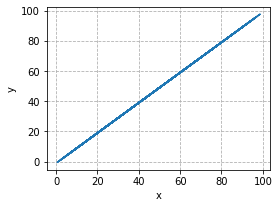

In [25]:
# x = np.array(range(5,105))
np.random.seed(seed=42)
x = (np.random.rand(1,100)*100 )[0]
y = x-1
fig, ax = plt.subplots(figsize=(4,3))

ax.plot(x,y,label='y=x-1')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(linestyle='--')
plt.show()

In [26]:
M = np.vstack((x.T,y.T)).T
M[:5]

array([[37.45401188, 36.45401188],
       [95.07143064, 94.07143064],
       [73.19939418, 72.19939418],
       [59.86584842, 58.86584842],
       [15.60186404, 14.60186404]])

In [0]:
from sklearn import preprocessing
# M = preprocessing.scale(M)

In [28]:
Cov = np.cov(M.T)
Cov

array([[884.99949666, 884.99949666],
       [884.99949666, 884.99949666]])

In [0]:
eig_val, eig_vec = np.linalg.eig(Cov)

In [30]:
eig_val

array([1.76999899e+03, 1.13686838e-13])

In [31]:
eig_vec

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [32]:
largest_eigval = eig_val[0]
print(largest_eigval)
largest_evec = eig_vec[:,0]
# largest_evec.shape
print(largest_evec)

1769.9989933248312
[0.70710678 0.70710678]


In [33]:
slope_ = (y[0] - y[1])/(x[0]-x[1])
slope_

1.0

In [0]:
# transform Ax = lambda*x
C_tr = np.matmul(Cov,eig_vec[:,1])
lambda_tr = eig_val[1]*eig_vec[:,1]

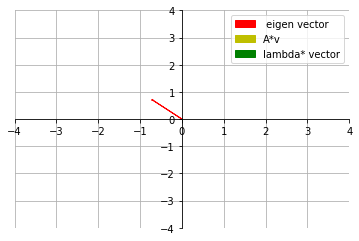

In [35]:
ub,lb = -4,4

ax = plt.axes()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.axis([ub, lb, ub, lb])
a2 = ax.arrow(0, 0, C_tr[0], C_tr[1], head_width=0.05, head_length=.01, fc='y', ec='y', label = 'A*v')
a3 = ax.arrow(0, 0, lambda_tr[0], lambda_tr[1], head_width=0.05, head_length=.01, fc='g', ec='g', label = 'lambda*v')
a1 = ax.arrow(0, 0, eig_vec[:,1][0], eig_vec[:,1][1], head_width=0.05, head_length=0.01, fc='r', ec='r', label='v') 

plt.legend([a1,a2, a3,  ], [' eigen vector', 'A*v', 'lambda* vector', ])
plt.grid()
plt.show()

In [0]:
# transform Ax = lambda*x
C_tr = np.matmul(Cov,largest_evec)
lambda_tr = largest_eigval* largest_evec

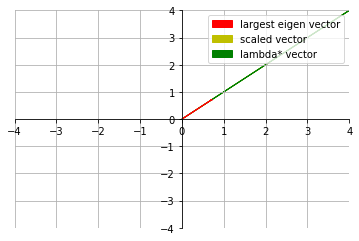

In [38]:
ub,lb = -4,4

ax = plt.axes()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.axis([ub, lb, ub, lb])
a2 = ax.arrow(0, 0, C_tr[0], C_tr[1], head_width=0.05, head_length=.01, fc='y', ec='y', label = 'A*v')
a3 = ax.arrow(0, 0, lambda_tr[0], lambda_tr[1], head_width=0.05, head_length=.01, fc='g', ec='g', label = 'lambda*v')
a1 = ax.arrow(0, 0, largest_evec[0], largest_evec[1], head_width=0.05, head_length=0.01, fc='r', ec='r', label='v') 

plt.legend([a1,a2, a3,  ], ['largest eigen vector', 'scaled vector', 'lambda* vector', ])
plt.grid()
plt.show()

## q7

In [39]:
import pandas as pd
url = 'https://raw.githubusercontent.com/20188202010/OM_Puzzles/master/points_Q7.txt'
dataset = pd.read_csv(url,header=None)
dataset

,0,1
0,7.755,2.989
1,7.979,2.885
2,2.697,2.903
3,7.699,2.599
4,8.460,2.889
...,...,...
95,2.936,2.854
96,8.402,2.772
97,7.559,3.328
98,2.787,2.817


In [40]:
print(len(dataset[0].iloc[:50]))
print(len(dataset[1].iloc[50:]))


50
50


In [41]:
firs_50_x = dataset[0].iloc[:50].mean(axis=0)
firs_50_y = dataset[1].iloc[:50].mean(axis=0)
last_50_x = dataset[0].iloc[50:].mean(axis=0)
last_50_y = dataset[1].iloc[50:].mean(axis=0)
C1 = [firs_50_x, firs_50_y]
C2 = [last_50_x, last_50_y]
init_c = [C1, C2]
print(init_c)

[[5.4101599999999985, 2.91962], [5.66258, 2.9562399999999998]]


In [69]:
# def compute_sse(X, labels, centroids):
#   distance = np.zeros(X.shape[0])
#   for k in range(2):
x1 = np.linalg.norm( dataset.iloc[:50] - C1)**2
x2 = np.linalg.norm( dataset.iloc[50:] - C2)**2
x1 + x2

626.1556217999998

### q7 a,b,c,d,e

In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init = np.asarray(init_c), random_state=42, verbose=2,algorithm='full')
kmeans_fit = kmeans.fit(dataset[[0,1]])

Initialization complete
Iteration  0, inertia 567.120
Iteration  1, inertia 16.522
Converged at iteration 1: center shift 0.000000e+00 within tolerance 3.138910e-04


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
kmeans_fit.inertia_

16.522436039999967

In [44]:
kmeans_fit.labels_

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1], dtype=int32)

In [0]:
# dataset['preds'] = kmeans_fit.labels_
x = dataset[0].tolist()
y = dataset[1].tolist()

[1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0
 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0
 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1]
[[3.0642  2.9691 ]
 [8.00854 2.90676]]


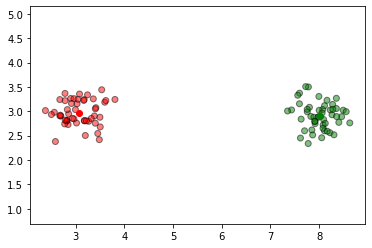

In [46]:
labels = kmeans_fit.predict(dataset[[0,1]])
print(labels)
centroids = kmeans_fit.cluster_centers_
print(centroids)
colmap = {1: 'r', 2: 'g', 3:'y'}
colors = list(map(lambda x: colmap[x+1], labels))

plt.scatter(x,y, color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
# plt.xlim(0, 1)
# plt.ylim(0, 1)
plt.axis('equal')
plt.show()

### q8

In [47]:
url = 'https://raw.githubusercontent.com/20188202010/OM_Puzzles/master/points.txt'
dataset8 = pd.read_csv(url,header=None)
dataset8

,0,1
0,3.808,3.242
1,2.916,3.160
2,2.381,3.014
3,3.168,3.222
4,3.222,2.804
...,...,...
95,7.849,2.616
96,7.350,3.006
97,7.910,2.794
98,7.722,3.505


In [0]:
def findObj(k,d):
    kmeans = KMeans(n_clusters=k, random_state=42,algorithm='full')
    kmeans_fit = kmeans.fit(dataset[[0,1]])
    return kmeans_fit.inertia_

In [0]:
y = []
y_n = []
x = list(range(1,101))
for k in x:
    obj = findObj(k, dataset8)
    y.append(obj)
    y_n.append(obj/k)

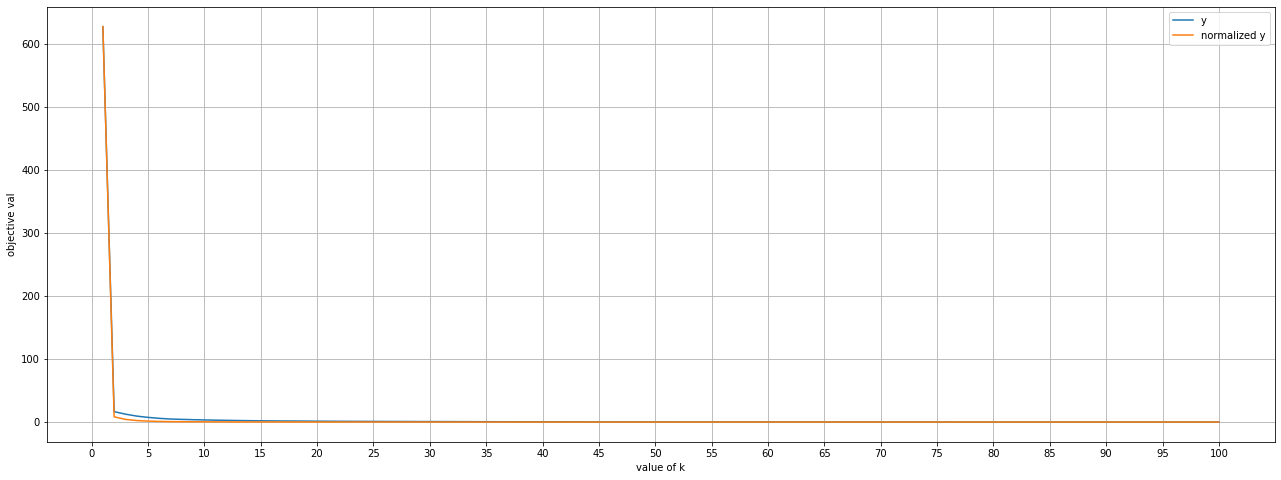

In [50]:
fig, ax = plt.subplots(figsize=(22,8))
ax.plot(x,y,label='y')
ax.plot(x,y_n,label='normalized y')

plt.xlabel('value of k')
plt.ylabel('objective val')
plt.xticks(np.arange(min(x)-1, max(x)+1, 5.0))
plt.grid(linestyle='-')
plt.legend()
plt.show()

In [51]:
y_n[-1]

0.0

In [52]:
y[-1]

0.0

In [53]:
y[0]

627.78204382